In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import seaborn as sns
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
def curveS(x, L, k, x0):
    """
    This is like a Fermi-Dirac type distribution
    Parameters:
    - x: Input data (independent variable).
    - L: Maximum value of the curve (upper asymptote).
    - k: Steepness of the curve.
    - x0: x-value of the sigmoid's midpoint.

    Returns:
    - Fitted curve values.
    """
    return L / (1 + np.exp(-k * (x - x0)))

In [3]:
def fitcurveS(x_data, y_data, ifplot=True):
    """
    Parameters:
    - x_data: Input data (independent variable).
    - y_data: Output data (dependent variable).
    Returns:
    - Fitted parameters: L, k, x0.
    """
    
    y_data_filtered = savgol_filter(y_data, window_length=11, polyorder=3)
    y_data_filtered = savgol_filter(y_data, window_length=12, polyorder=3)
    y_data_filtered = savgol_filter(y_data, window_length=13, polyorder=3)
    initial_guess = [max(y_data_filtered), 1, np.median(x_data)]
    
    # Use curve_fit to find the best-fitting parameters
    fitted_params, _ = curve_fit(curveS, x_data, y_data_filtered, p0=initial_guess)
    
    # Generate the fitted curve
    fitted_curve = curveS(x_data, *fitted_params)

    if ifplot:
        plt.figure()
        plt.scatter(x_data, y_data_filtered, label='Dataset', s=5, c='k')
        plt.plot(x_data, fitted_curve, label='Fitted Curve', color='red')
        plt.legend()
        plt.xlabel('Distance A--B')
        plt.ylabel('Key Rates')
        #plt.title('Curve Fit for required data')
        plt.show()

    return fitted_params


In [4]:
data = pd.read_csv("3stage1.csv")

In [5]:
line = np.array(data.Line)
Square = np.array(data.Square)
Ring = np.array(data.Ring)
Star = np.array(data.Star)
x=np.arange(0, len(line))

/var/folders/sy/t_db6zn943qgnmq60lgt6fsw0000gn/T/ipykernel_47381/2550351909.py:13: RuntimeWarning: overflow encountered in exp
  return L / (1 + np.exp(-k * (x - x0)))


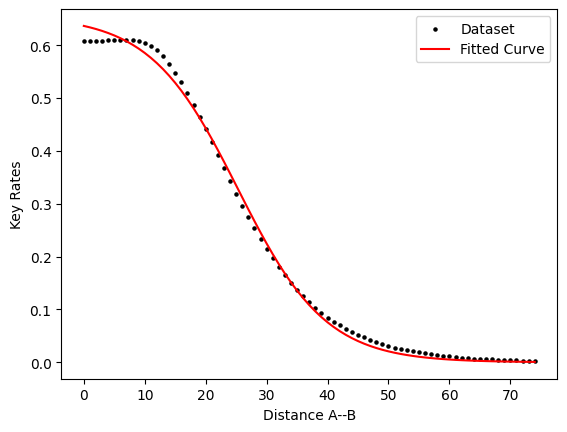

In [6]:
x= np.arange(0, len(line))
a = fitcurveS(x, line)

In [7]:
print(a)

[ 0.65552492 -0.13853475 25.30308256]


In [8]:
print(line)

[0.60801 0.60861 0.60511 0.6115  0.61004 0.61241 0.60388 0.61112 0.6108
 0.61269 0.60171 0.59642 0.59385 0.58432 0.56511 0.54924 0.52768 0.5098
 0.48407 0.46465 0.44606 0.4179  0.38618 0.36749 0.34492 0.31404 0.29824
 0.27116 0.25516 0.2348  0.21945 0.19686 0.18045 0.16394 0.14949 0.13767
 0.12745 0.11293 0.10373 0.09319 0.08423 0.07686 0.06939 0.06325 0.05714
 0.05514 0.0483  0.04185 0.03727 0.03458 0.0317  0.02804 0.0265  0.0232
 0.01972 0.01838 0.01781 0.01609 0.01465 0.01297 0.01084 0.01038 0.00917
 0.00835 0.00675 0.00643 0.00598 0.00518 0.0048  0.00531 0.0045  0.00309
 0.00286 0.00286 0.00295]


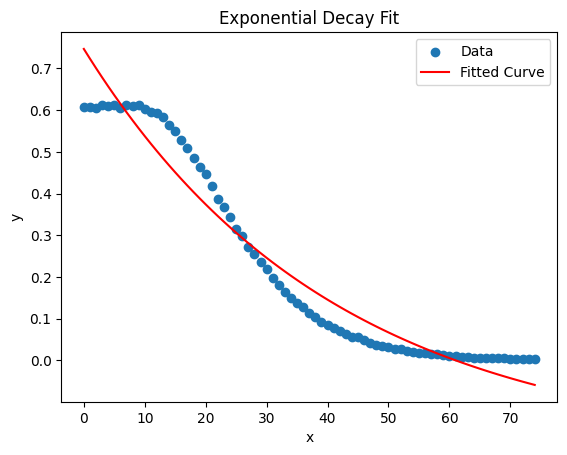

Fitted parameters (A, k, c): [ 0.96276378  0.02447374 -0.21614116]


In [9]:
# Data
y_data = line
x_data = np.arange(len(y_data))

# Exponential decay function
def exponential_decay(x, A, k, c):
    return A * np.exp(-k * x) + c

# Fit the data using curve_fit
popt, _ = curve_fit(exponential_decay, x_data, y_data)

# Plot the original data and the fitted curve
plt.scatter(x_data, y_data, label='Data', marker='o')
plt.plot(x_data, exponential_decay(x_data, *popt), 'r-', label='Fitted Curve')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Exponential Decay Fit')
plt.show()

print("Fitted parameters (A, k, c):", popt)


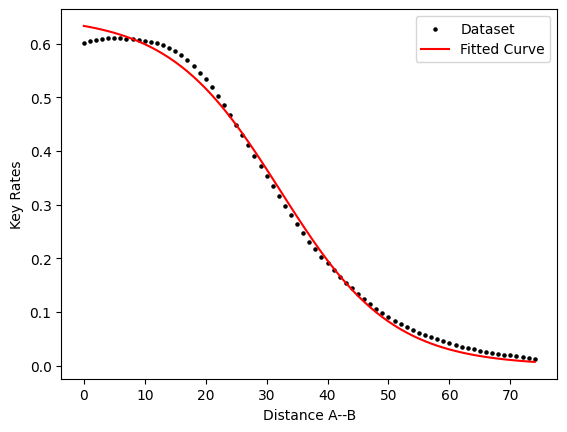

array([ 0.65214312, -0.10920417, 32.25667066])

In [10]:
x= np.arange(0, len(Ring))
fitcurveS(x, Ring)

In [11]:
x= np.arange(0, len(b200))
fitcurveS(x, b200)

NameError: name 'b200' is not defined

In [12]:
burst = [1, 50, 100, 150, 200]
plt.scatter(burst, parameters)

NameError: name 'parameters' is not defined

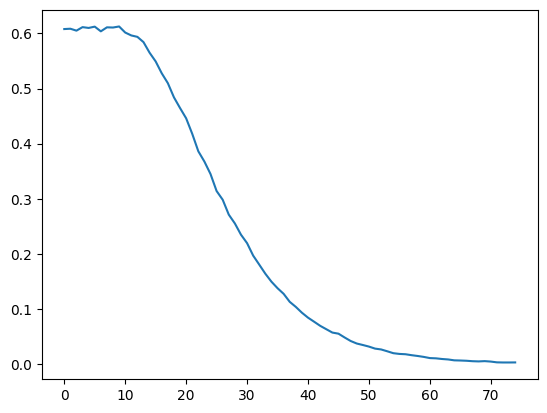

In [13]:
plt.plot(x, line)

In [14]:
x_data=x
    #initial_guess = [max(y_data), 1, np.median(x_data)]  # Initial parameter guess
y_data = savgol_filter(line, window_length=11, polyorder=3)

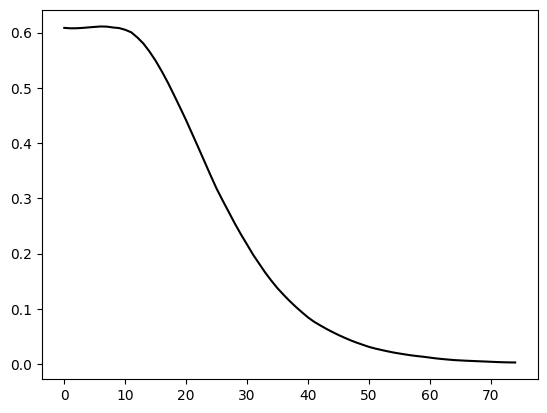

In [15]:
plt.plot(x_data, y_data, c='k')
#plt.scatter(x, line, s=2)

In [49]:
data = pd.read_csv("3stage.csv")

In [50]:
display(data)

,Burst1,Burst50,Burst100,Burst150,Burst200
0,0.55423,0.60801,0.62291,0.61392,0.61483
1,0.50010,0.62220,0.61573,0.61503,0.62038
2,0.45629,0.61312,0.60961,0.61031,0.60771
3,0.41465,0.61332,0.62028,0.61947,0.62210
4,0.36769,0.61091,0.62647,0.61826,0.60731
...,...,...,...,...,...
75,0.00038,0.01105,0.02311,0.03465,0.04652
76,0.00017,0.00983,0.01951,0.03102,0.04069
77,0.00011,0.00851,0.01739,0.02725,0.03597
78,0.00000,0.00810,0.01622,0.02415,0.03276


In [51]:
b1 = np.array(data.Burst1)
b50 = np.array(data.Burst50)
b100 = np.array(data.Burst100)
b150 = np.array(data.Burst150)
b200 = np.array(data.Burst200)


barr = [b1, b50, b100, b150, b200]

/var/folders/sy/t_db6zn943qgnmq60lgt6fsw0000gn/T/ipykernel_47381/2550351909.py:13: RuntimeWarning: overflow encountered in exp
  return L / (1 + np.exp(-k * (x - x0)))


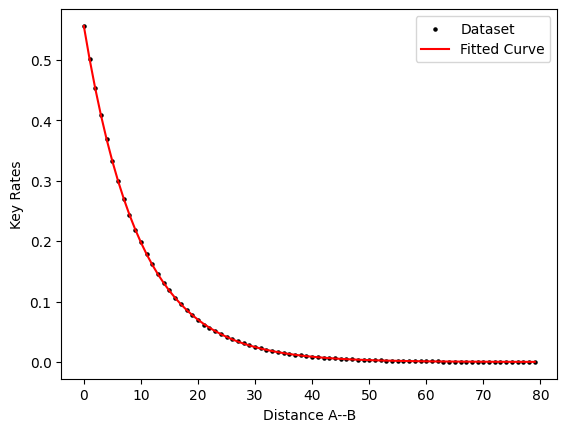

[ 33.68200723  -0.10440155 -39.14920232]


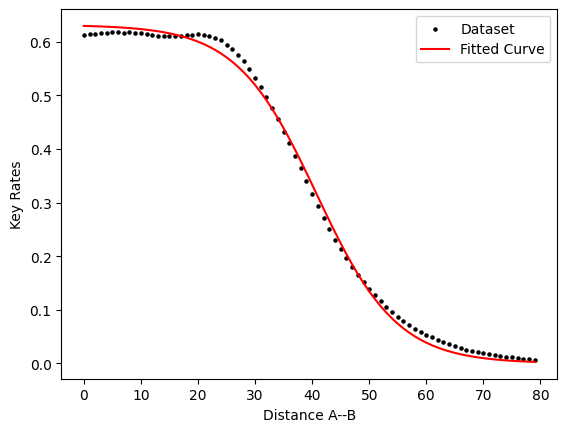

[ 0.63129097 -0.14211769 40.79439868]


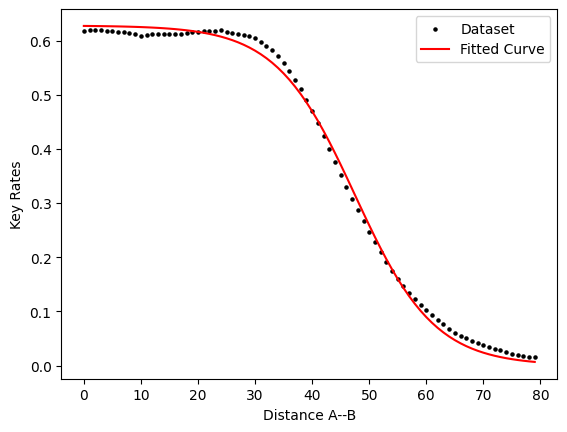

[ 0.62758959 -0.14415768 47.54878329]


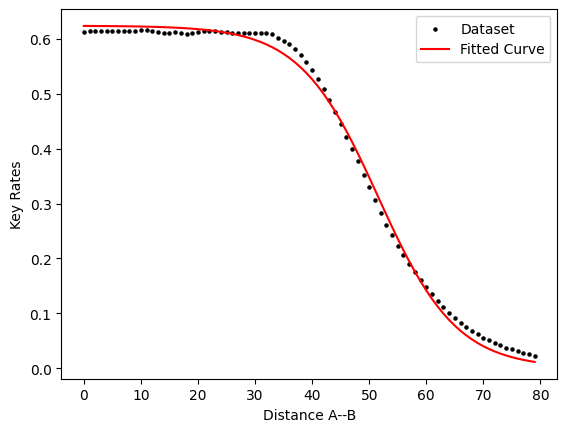

[ 0.62415302 -0.14559529 51.57477641]


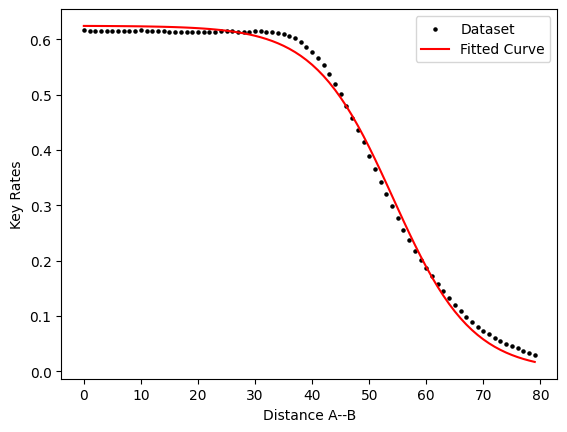

[ 0.62461364 -0.14507519 54.20926127]


In [52]:
parametersk = []
parametersx0 = []
for b in barr:
    x = np.arange(0, len(b))
    p = fitcurveS(x, b)
    print(p)
    parametersk.append(p[1])
    parametersx0.append(p[2])

In [53]:
b = np.array([b1, b50, b100, b150, b200])

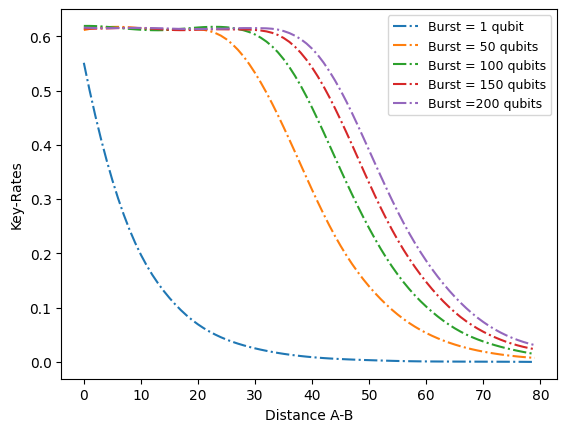

In [54]:
label1=['Burst = 1 qubit', 'Burst = 50 qubits', 'Burst = 100 qubits', 'Burst = 150 qubits', 'Burst =200 qubits']
x = np.array(range(0, 80))
arr = b;
for i in range(len(arr)):
    y_data = savgol_filter(arr[i], window_length=15, polyorder=2)
    y_data = savgol_filter(y_data,window_length=15, polyorder=3)
    y_data = savgol_filter(y_data, window_length=5, polyorder=3)
    plt.plot(x, y_data, ls='-.', label=label1[i])
    plt.xlabel('Distance A-B')
    plt.ylabel('Key-Rates')
    plt.legend(fontsize=9)
plt.savefig('3-stage-highorderburst', dpi=1000)

ValueError: x and y must have same first dimension, but have shapes (10,) and (5,)

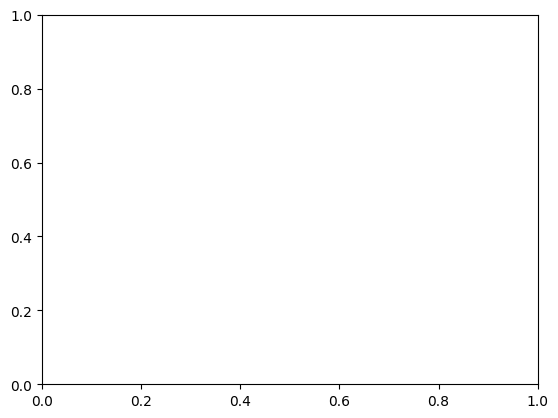

In [55]:
plt.plot(burst, parametersx0)

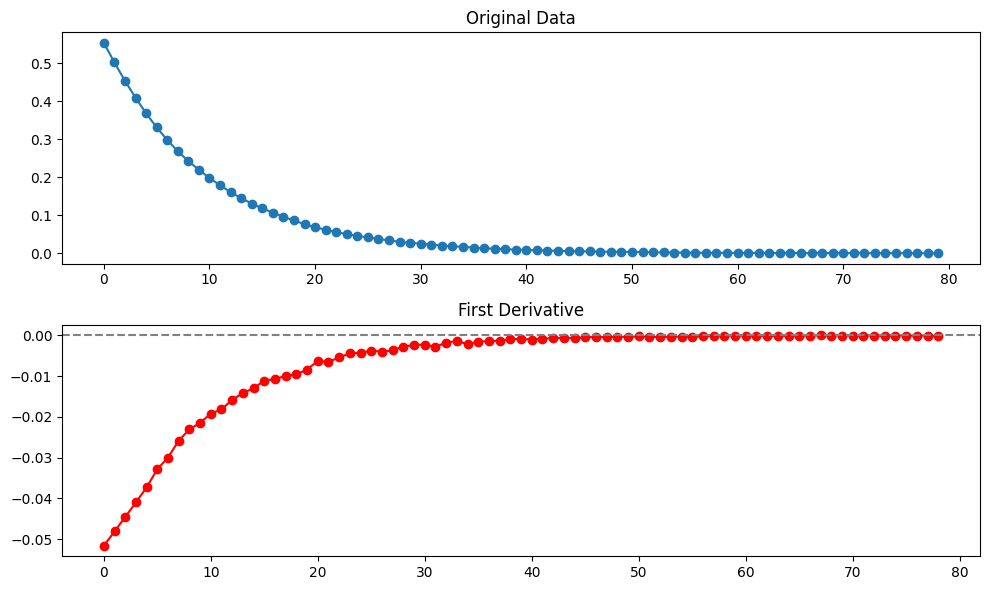

The dataset starts transitioning at index 1 with value 0.502542797202797


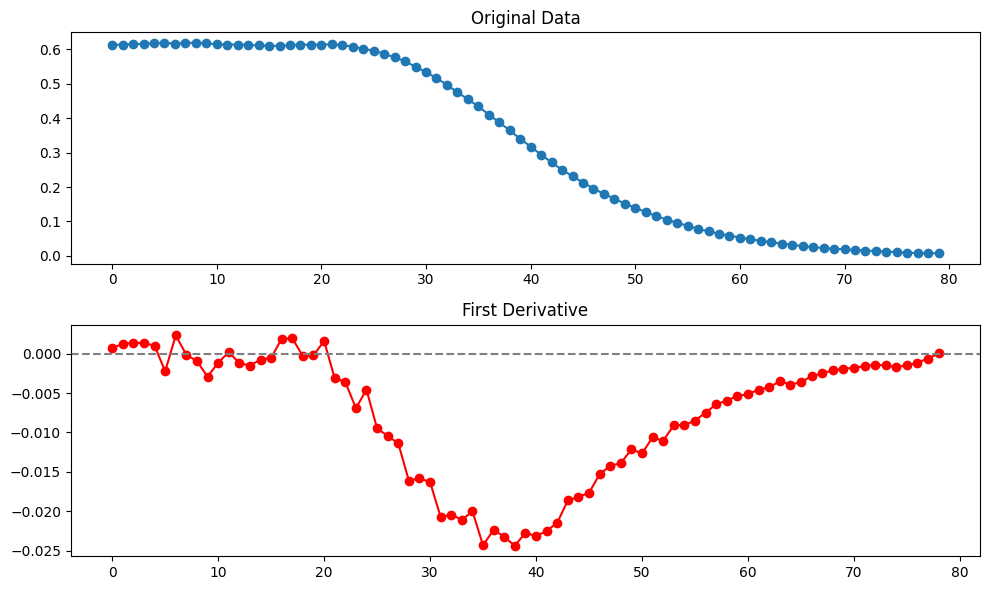

The dataset starts transitioning at index 22 with value 0.6110203729603746


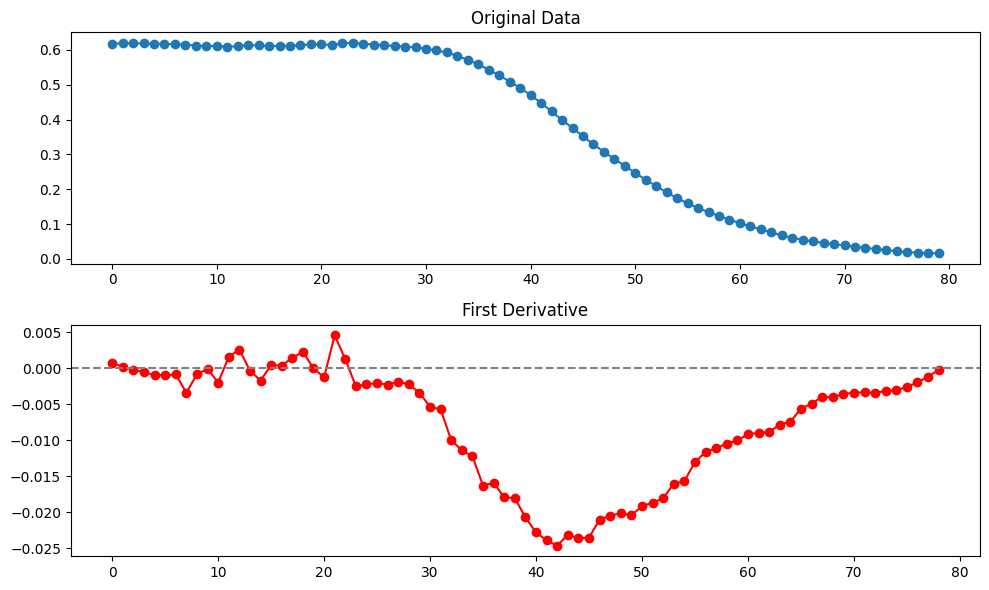

The dataset starts transitioning at index 30 with value 0.603923170163172


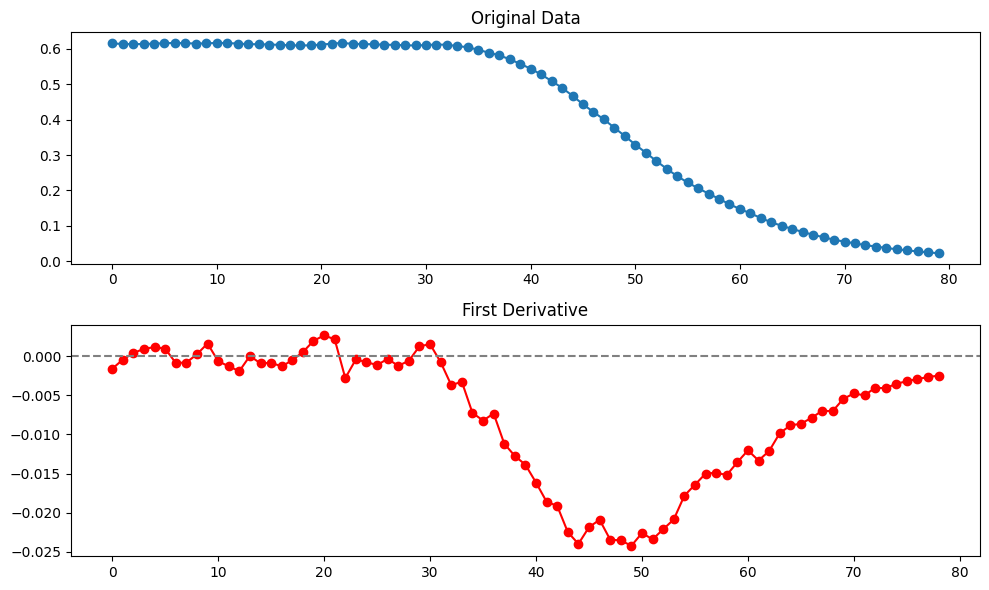

The dataset starts transitioning at index 33 with value 0.6075992307692323


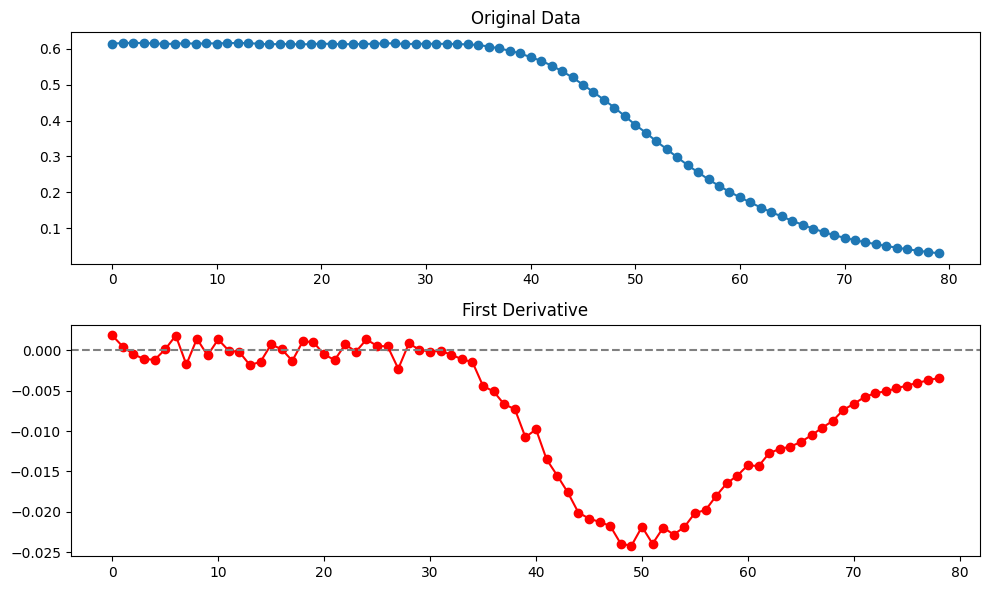

The dataset starts transitioning at index 36 with value 0.6065496037296055


In [23]:
filtered = []
transition=[]
for i in range(len(b)):
    
    x = np.arange(0, len(b[i]))
    #plt.plot(x,b[i], label='unfiltered')
    y_data = savgol_filter(b[i], window_length=11, polyorder=3)    
    
    
    
    data = y_data
    # Compute the first derivative
    derivative = np.diff(data)

    # Plot the data and its derivative for visualization
    plt.figure(figsize=(10, 6))

    plt.subplot(2, 1, 1)
    plt.plot(data, '-o', label="Data")
    plt.title("Original Data")

    plt.subplot(2, 1, 2)
    plt.plot(derivative, '-o', label="Derivative", color="red")
    plt.axhline(0, color='gray', linestyle='--')
    plt.title("First Derivative")
    plt.tight_layout()
    plt.show()

    # Finding the transition point
    threshold = -0.0025  # This threshold can be adjusted
    transition_points = np.where(derivative < threshold)[0]
    transition.append(transition_points)
    # The first consistent negative value after flatline
    transition_point = None
    for i in range(1, len(transition_points)):
        if transition_points[i] - transition_points[i-1] == 1:
            transition_point = transition_points[i]
            break

    if transition_point is not None:
        print(f"The dataset starts transitioning at index {transition_point} with value {data[transition_point]}")
    else:
        print("Couldn't find a clear transition point.")


In [24]:
x_data=x
    #initial_guess = [max(y_data), 1, np.median(x_data)]  # Initial parameter guess
y_data = savgol_filter(b200, window_length=12, polyorder=3)

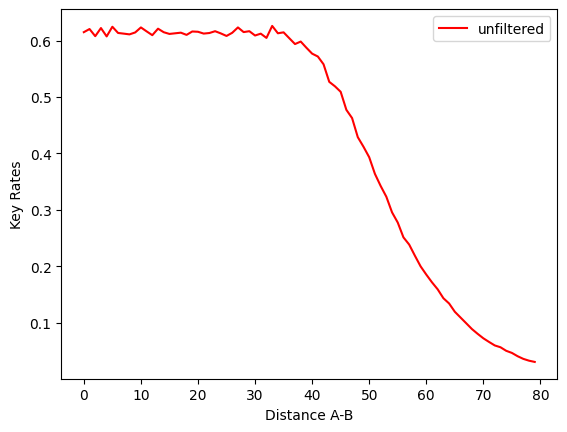

In [25]:
plt.plot(b200,label='unfiltered', c='r')
#plt.plot(y_data, label='filtered', c='k')
plt.xlabel("Distance A-B")
plt.ylabel("Key Rates")
plt.legend()
plt.show()

In [26]:
print(b200)

[0.61483 0.62038 0.60771 0.6221  0.60731 0.62444 0.61342 0.61221 0.61091
 0.61433 0.62322 0.61624 0.60951 0.62099 0.61473 0.61171 0.61282 0.61392
 0.61001 0.61604 0.61553 0.61232 0.61332 0.61654 0.61262 0.60811 0.61372
 0.62322 0.61495 0.61655 0.60892 0.61218 0.60463 0.62589 0.61287 0.61451
 0.60408 0.59377 0.59819 0.58718 0.57677 0.5717  0.55793 0.52681 0.51888
 0.50914 0.47718 0.4626  0.4288  0.41179 0.39321 0.36378 0.34245 0.32328
 0.29559 0.27752 0.25125 0.23854 0.21886 0.19995 0.18532 0.17157 0.15916
 0.1434  0.13411 0.11943 0.10922 0.09904 0.08878 0.08033 0.07241 0.06593
 0.05976 0.05655 0.05028 0.04652 0.04069 0.03597 0.03276 0.03057]


In [27]:
transition = []

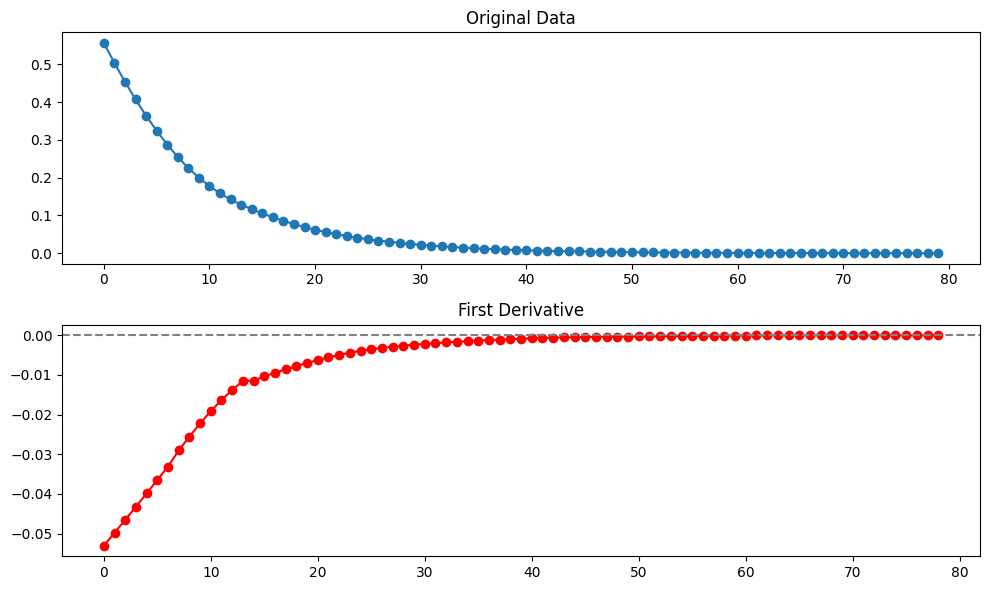

The dataset starts transitioning at index 2 with value 0.4535859845457035


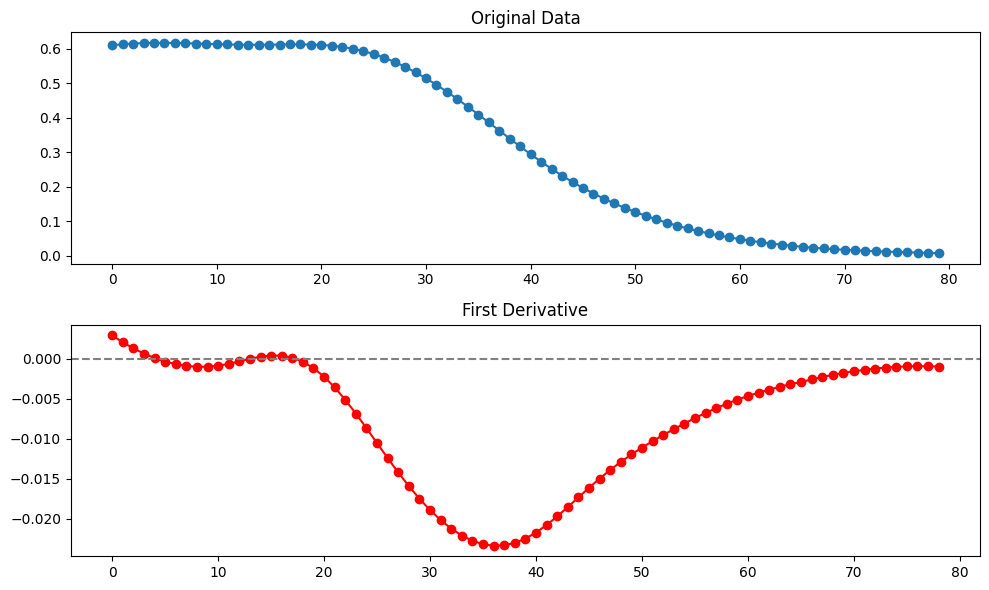

The dataset starts transitioning at index 22 with value 0.605974628243402


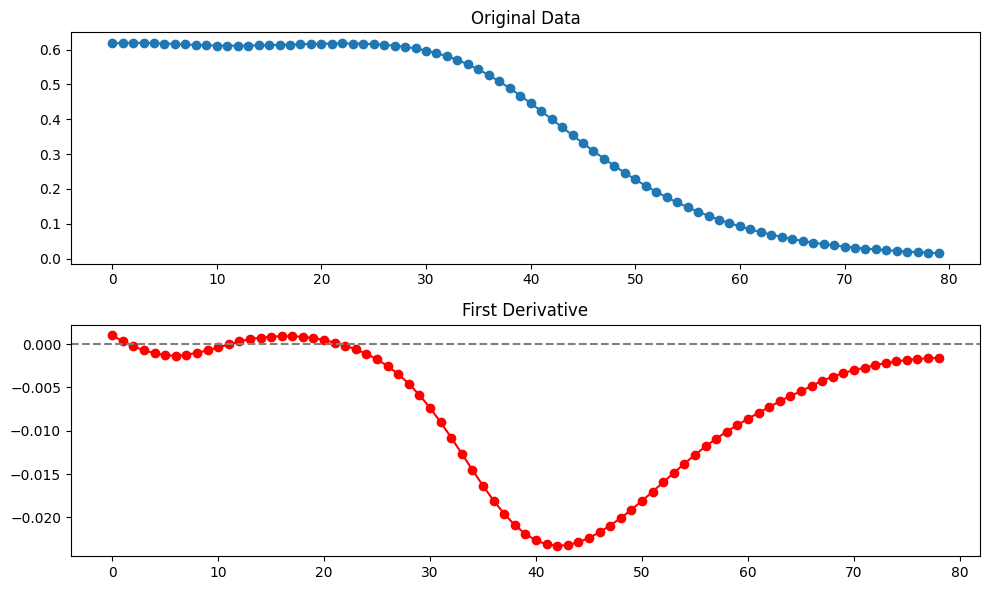

The dataset starts transitioning at index 28 with value 0.6078234536568319


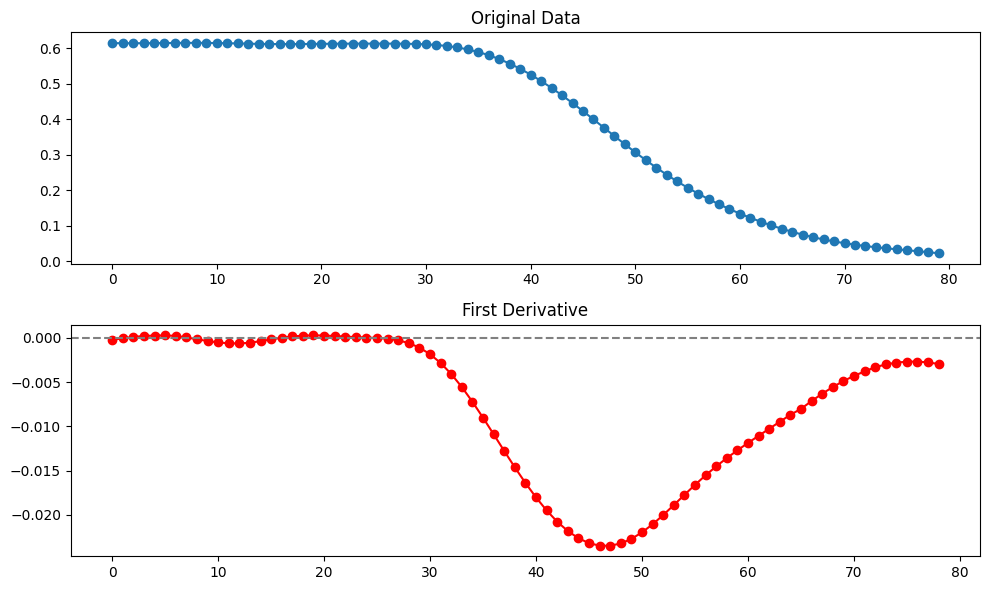

The dataset starts transitioning at index 33 with value 0.6021228325751787


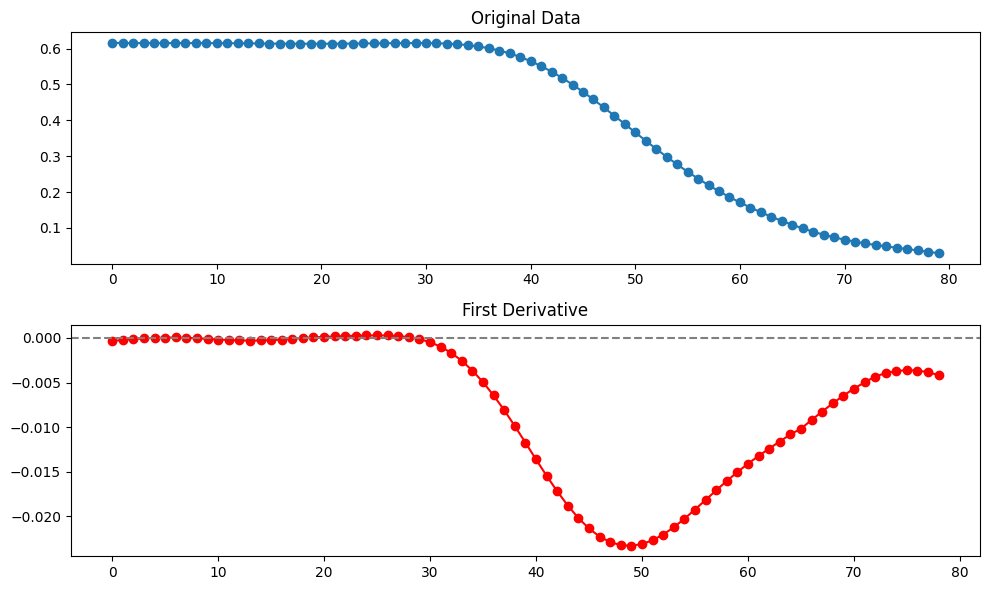

The dataset starts transitioning at index 35 with value 0.6060011093110983


In [28]:
def find_transition_point(data):
    # Compute the first derivative

    derivative = np.diff(data)

    # Plot the data and its derivative for visualization
    plt.figure(figsize=(10, 6))

    plt.subplot(2, 1, 1)
    plt.plot(data, '-o', label="Data")
    plt.title("Original Data")

    plt.subplot(2, 1, 2)
    plt.plot(derivative, '-o', label="Derivative", color="red")
    plt.axhline(0, color='gray', linestyle='--')
    plt.title("First Derivative")
    plt.tight_layout()
    plt.show()

    # Finding the transition point
    threshold = -0.002  # This threshold can be adjusted
    transition_points = np.where(derivative < threshold)[0]

    # The first consistent negative value after flatline
    transition_point = None
    for i in range(1, len(transition_points)):
        if (transition_points[i] - transition_points[i-1] == 1) and (i!=1) :
            transition_point = transition_points[i]
            break

    if transition_point is not None:
        print(f"The dataset starts transitioning at index {transition_point} with value {data[transition_point]}")
    else:
        print("Couldn't find a clear transition point.")
        
    return transition_point

filtered = []

# Assuming 'b' is a list of datasets

for dataset in b:
    y_data = savgol_filter(dataset, window_length=12, polyorder=3)
    y_data = savgol_filter(y_data,window_length=13, polyorder=3)
    y_data = savgol_filter(y_data,window_length=14, polyorder=3)
    y_data = savgol_filter(y_data,window_length=15, polyorder=3)
    point = find_transition_point(y_data)
    transition.append(point)


In [29]:
transition

[2, 22, 28, 33, 35]

In [30]:
burst=np.array([1, 50, 100, 150, 200])

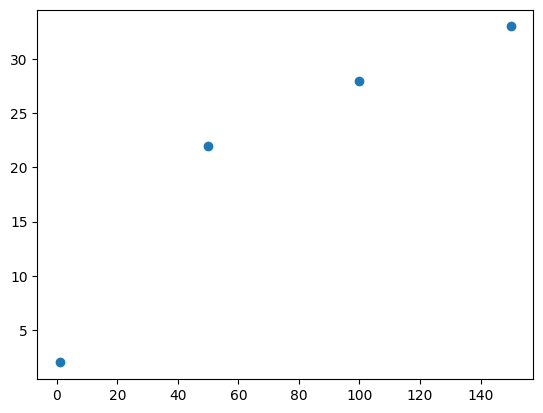

In [31]:
plt.scatter(burst[:4], transition[:4])

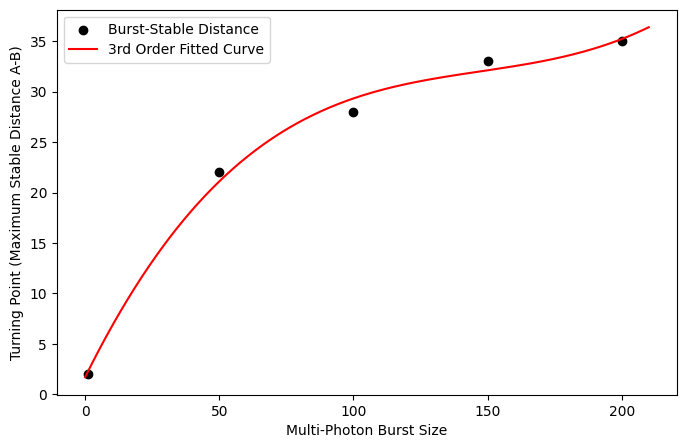

Fitted parameters: a=1.693613, b=0.538443, c=-0.003388, d=0.000008


In [56]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def polynomial(x, a, b, c, d):
    return a + b*x + c*x**2 + d*x**3

# Given dataset
x_data = np.array([1, 50, 100, 150, 200])
y_data = np.array([2, 22, 28, 33, 35])

# Use curve_fit to find the best-fitting parameters for the polynomial function.
params, covariance = curve_fit(polynomial, x_data, y_data)

# Generate the fitted curve.
x_fit = np.linspace(0, 210, 400)
y_fit = polynomial(x_fit, *params)

# Plot the data and the fitted curve.
plt.figure(figsize=(8, 5))
plt.scatter((x_data), y_data, color='k', label='Burst-Stable Distance')
plt.plot((x_fit), y_fit, color='r', label='3rd Order Fitted Curve')

# Construct the equation string and display on the graph
equation_str = f"y = {params[0]:.2f} + {params[1]:.2f}x + {params[2]:.2f}x^2 + {params[3]:.2f}x^3"
#plt.annotate(equation_str, xy=(0.05, 0.75), xycoords='axes fraction', color='red', fontsize=10)

plt.legend()
plt.ylabel('Turning Point (Maximum Stable Distance A-B)')
plt.xlabel('Multi-Photon Burst Size')
#plt.title('Curve Fitting using Polynomial Function')
#plt.grid(True)
plt.savefig('lowerorderbursttransition', dpi=1000)
plt.show()

print(f"Fitted parameters: a={params[0]:.6f}, b={params[1]:.6f}, c={params[2]:.6f}, d={params[3]:.6f}")


In [33]:
print(transition)

[2, 22, 28, 33, 35]


In [34]:
extra_data = pd.read_csv("3stage1200.csv")

In [35]:
display(extra_data)

,Burst400,Burst600,Burst800,Burst1000,Burst1200
0,0.60500,0.63908,0.61422,0.62412,0.60720
1,0.61764,0.61966,0.60480,0.62454,0.61362
2,0.61382,0.60820,0.60840,0.59786,0.62048
3,0.62250,0.61462,0.62028,0.61180,0.62028
4,0.62392,0.62108,0.60840,0.61826,0.62434
...,...,...,...,...,...
105,0.00000,0.00000,0.00000,0.00000,0.00000
106,0.00000,0.00000,0.00000,0.00000,0.00000
107,0.00000,0.00000,0.00000,0.00000,0.00000
108,0.00000,0.00000,0.00000,0.00000,0.00000


In [36]:
b400 = np.array(extra_data.Burst400)
b600 = np.array(extra_data.Burst600)
b800 = np.array(extra_data.Burst800)
b1000 = np.array(extra_data.Burst1000)
b1200 = np.array(extra_data.Burst1200)

In [37]:
b = [b1, b50, b100, b150, b200, b400, b600, b800, b1000, b1200]

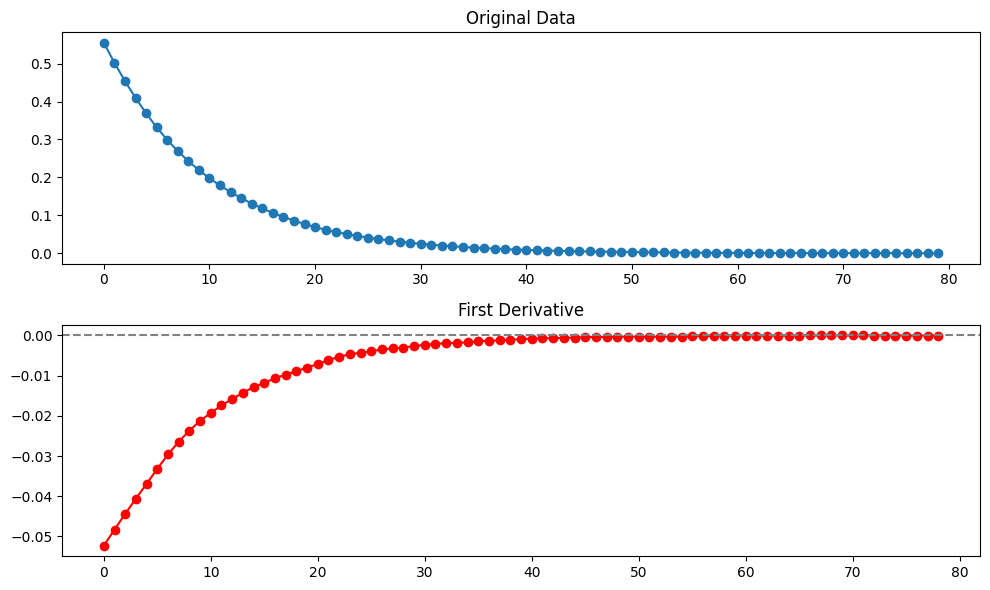

The dataset starts transitioning at index 2 with value 0.45397247569834953


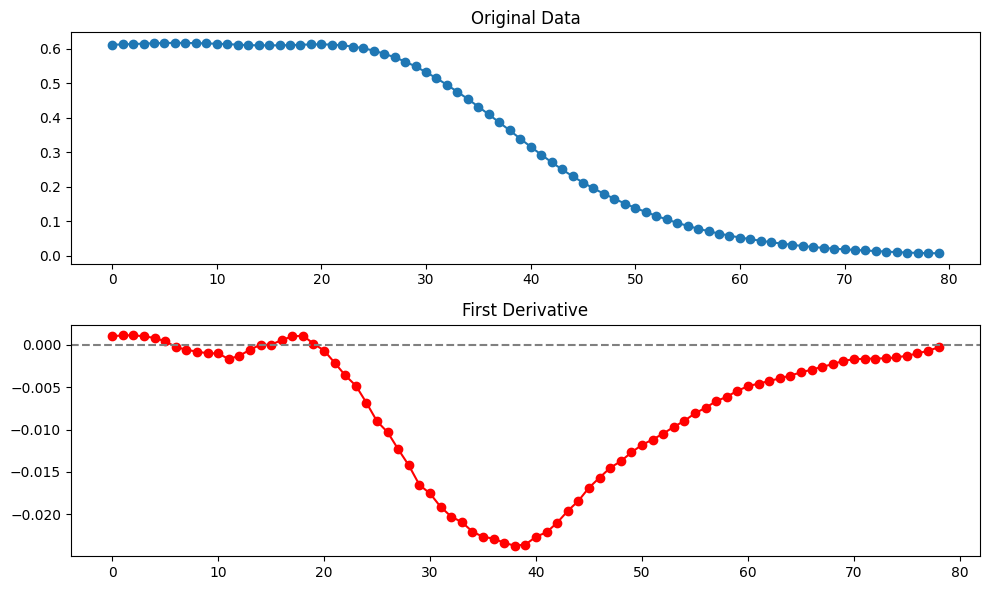

The dataset starts transitioning at index 23 with value 0.606959292222932


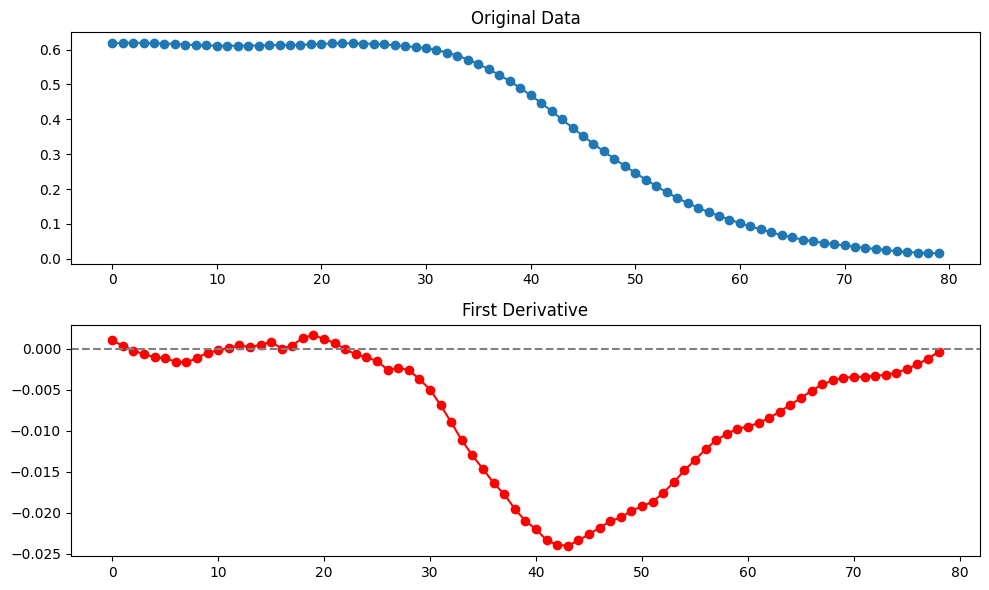

The dataset starts transitioning at index 28 with value 0.6099124661352668


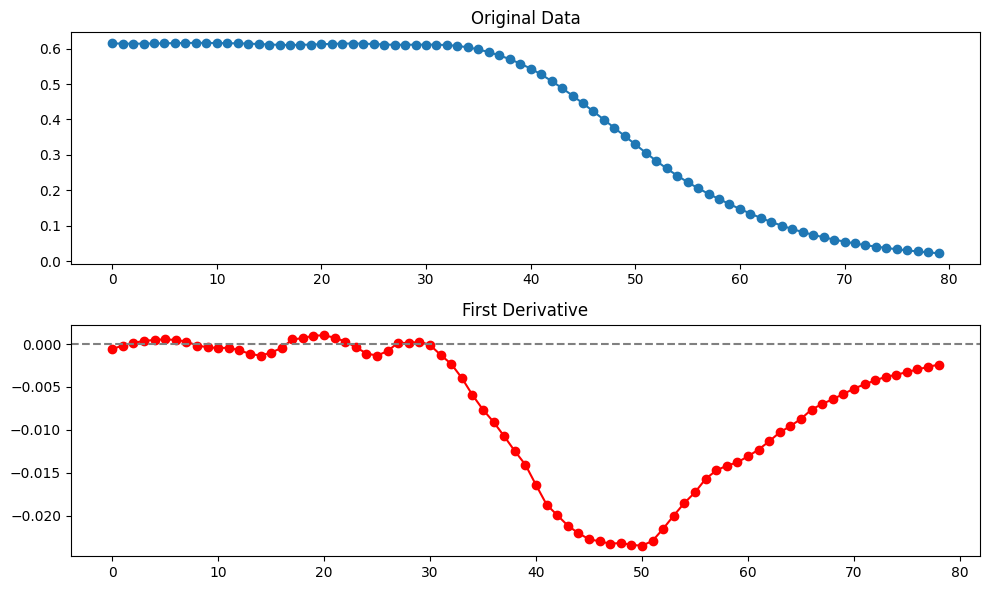

The dataset starts transitioning at index 34 with value 0.6035587747295473


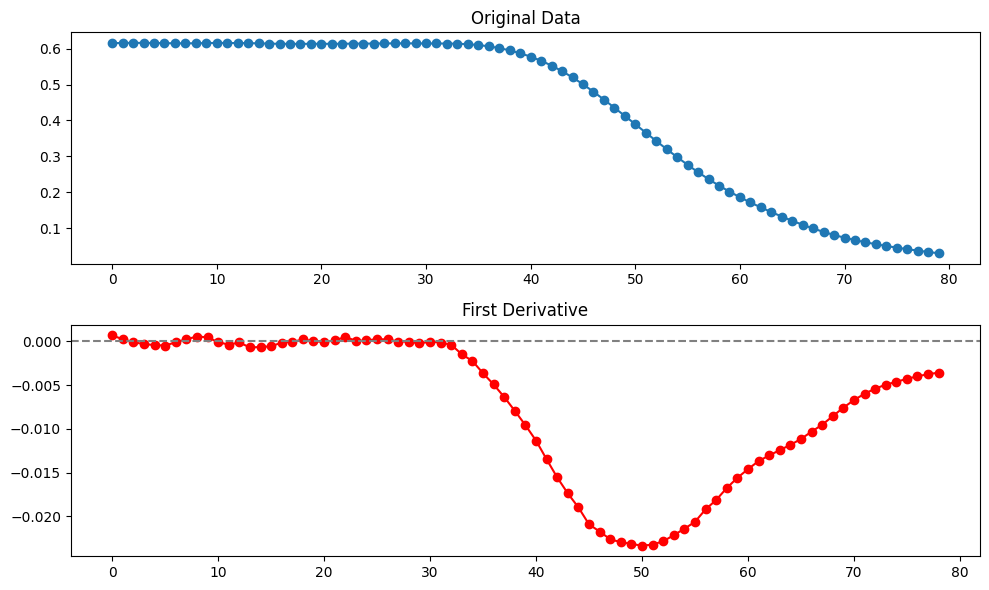

The dataset starts transitioning at index 36 with value 0.6064449280866797


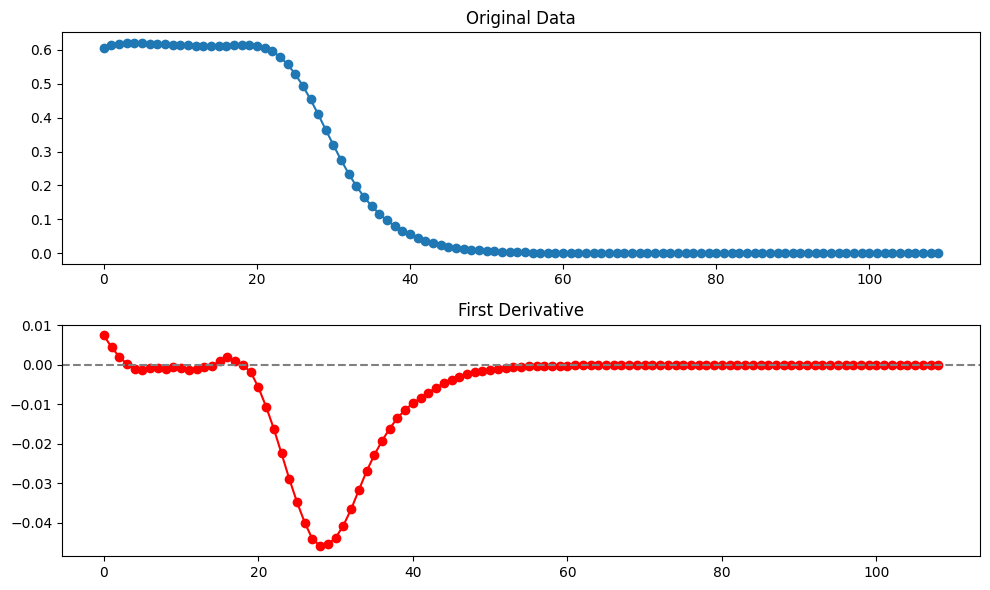

The dataset starts transitioning at index 22 with value 0.5958380624969466


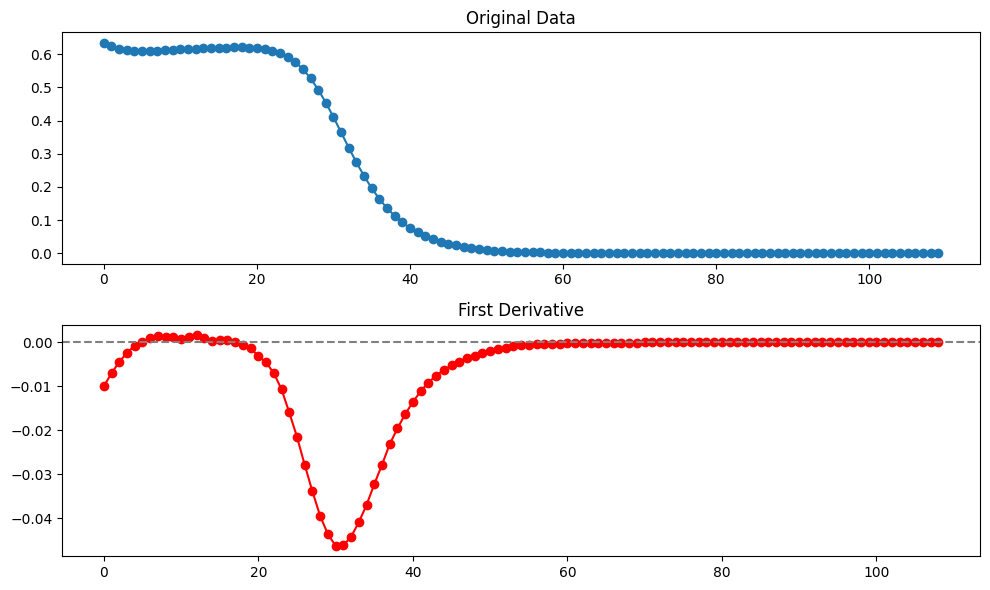

The dataset starts transitioning at index 2 with value 0.6169830117202143


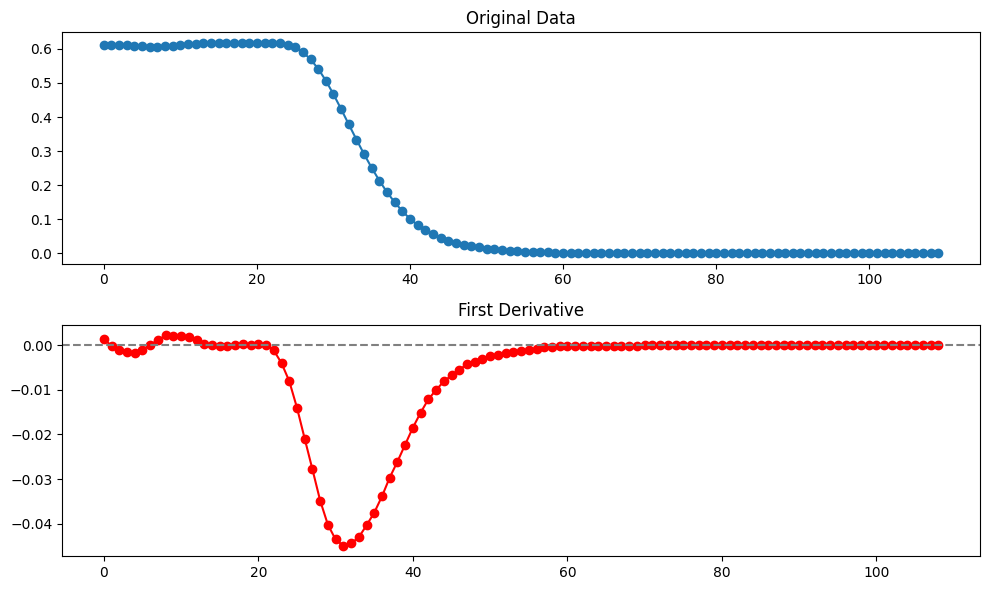

The dataset starts transitioning at index 25 with value 0.6046196158464723


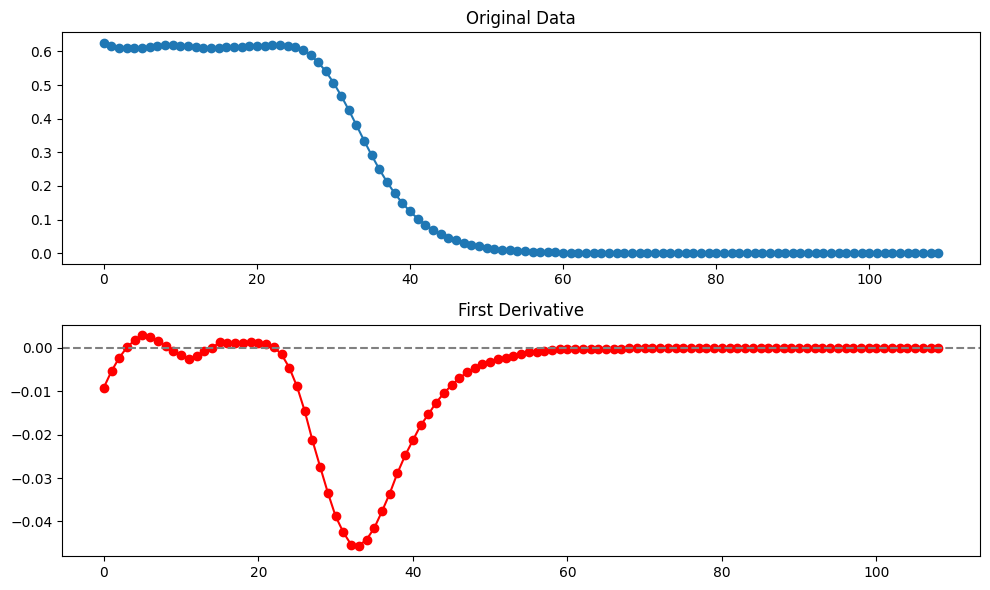

The dataset starts transitioning at index 2 with value 0.6110816256160314


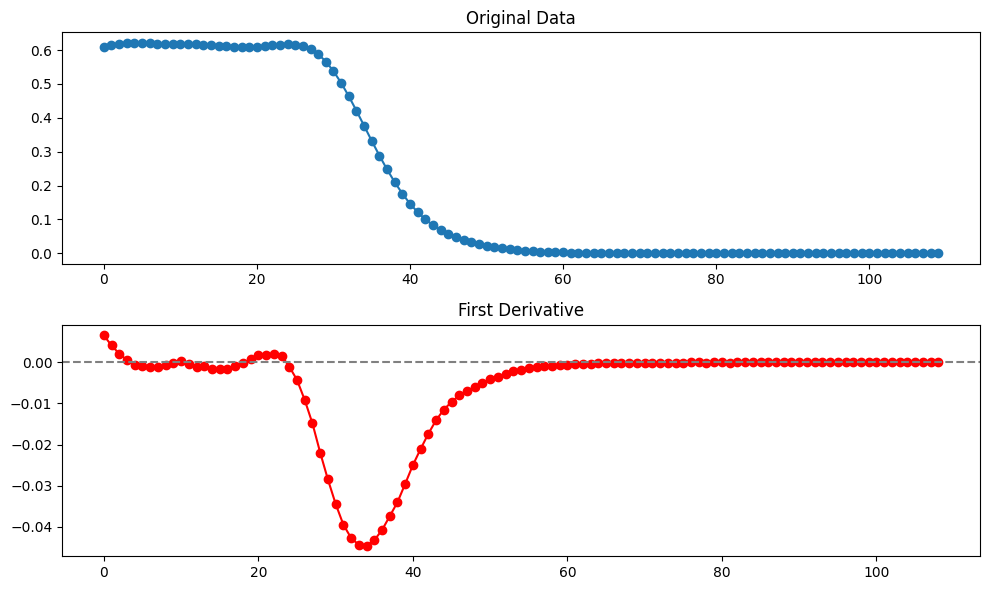

The dataset starts transitioning at index 27 with value 0.6028330701311153


In [38]:
filtered = []
transition = []

# Assuming 'b' is a list of datasets

for dataset in b:
    y_data = savgol_filter(dataset, window_length=11, polyorder=3)
    y_data = savgol_filter(y_data,window_length=11, polyorder=3)
    point = find_transition_point(y_data)
    transition.append(point)

In [39]:
print(transition)

[2, 23, 28, 34, 36, 22, 2, 25, 2, 27]


In [40]:
transition = np.array([1, 22, 29, 31, 36, 21, 20, 25, 26, 26])

/var/folders/sy/t_db6zn943qgnmq60lgt6fsw0000gn/T/ipykernel_47381/2550351909.py:13: RuntimeWarning: overflow encountered in exp
  return L / (1 + np.exp(-k * (x - x0)))


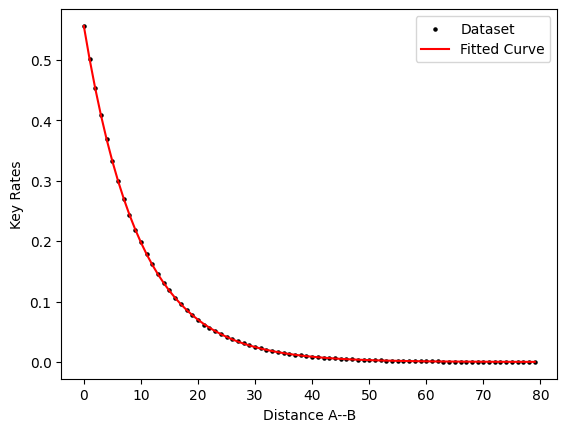

[ 33.68200723  -0.10440155 -39.14920232]


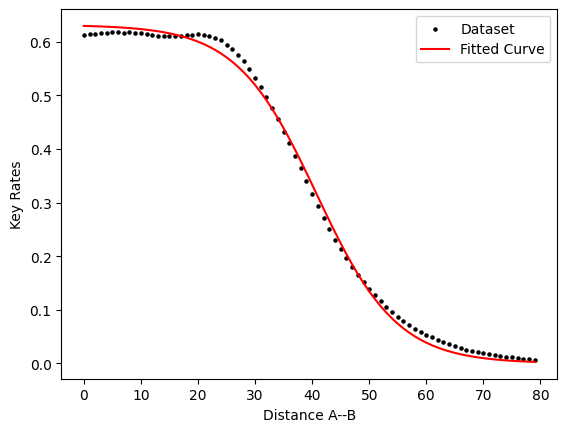

[ 0.63129097 -0.14211769 40.79439868]


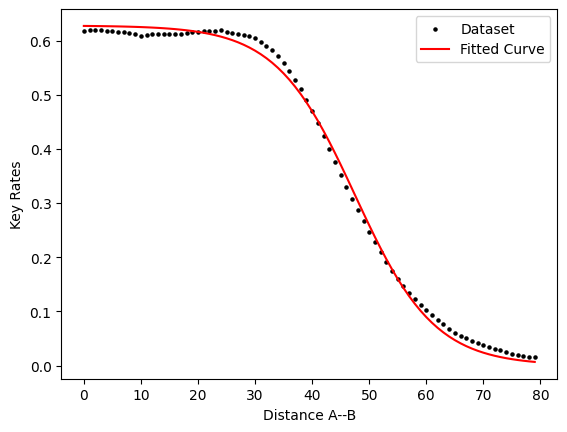

[ 0.62758959 -0.14415768 47.54878329]


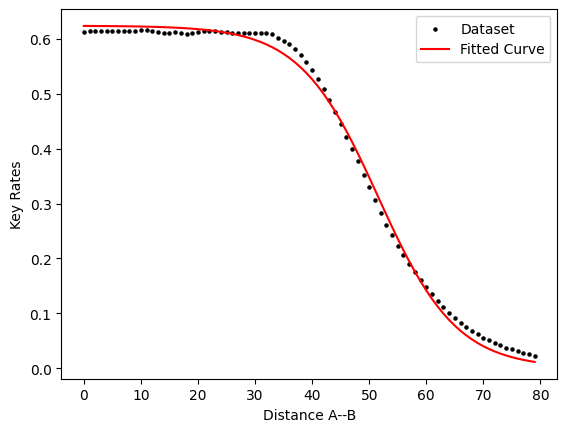

[ 0.62415302 -0.14559529 51.57477641]


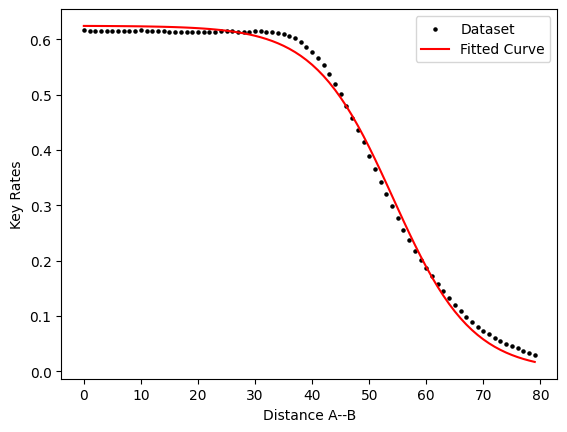

[ 0.62461364 -0.14507519 54.20926127]


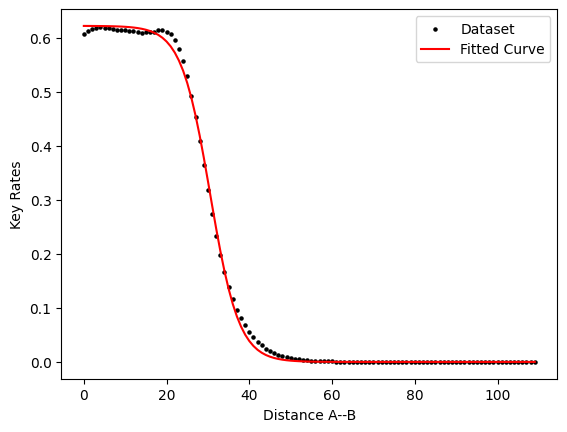

[ 0.62256498 -0.28657607 30.53293046]


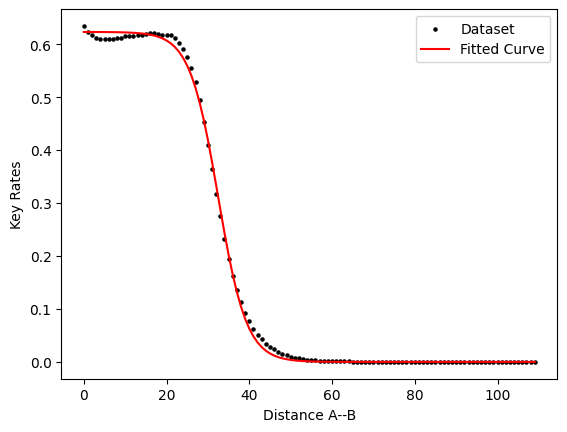

[ 0.62310839 -0.29052595 32.47532756]


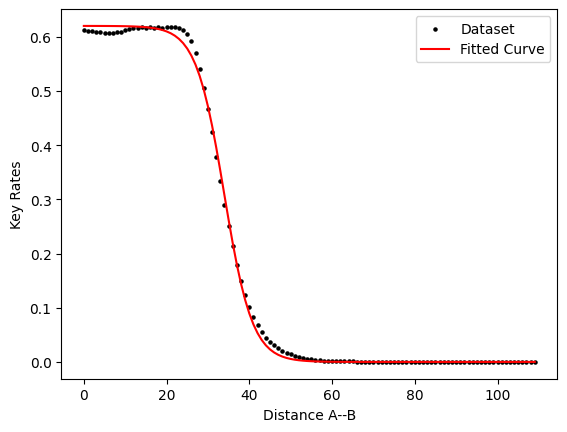

[ 0.62000953 -0.29374757 33.93890756]


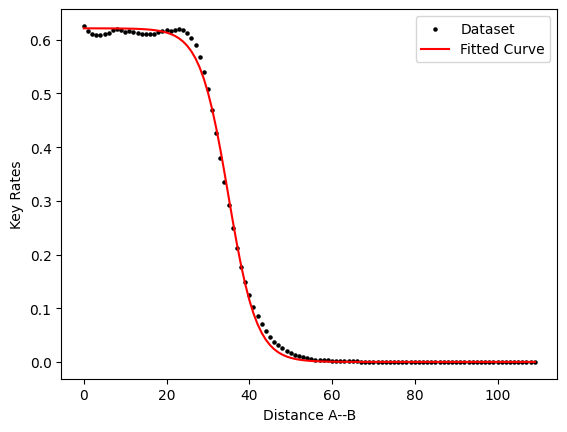

[ 0.6213218  -0.29133728 34.93165372]


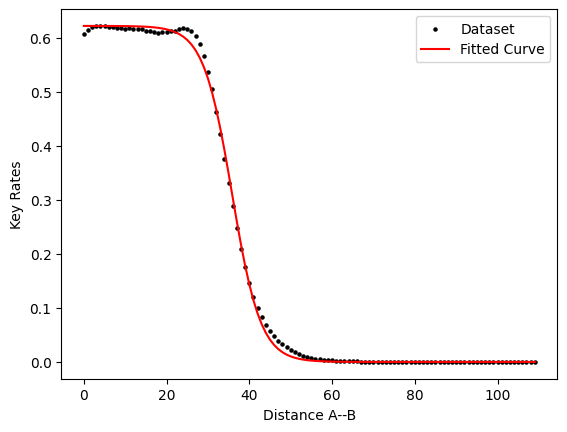

[ 0.62173157 -0.28895284 35.84010412]


In [41]:
barr = [b1, b50, b100, b150, b200, b400, b600, b800, b1000, b1200]
parametersk = []
parametersx0 = []
for b in barr:
    x = np.arange(0, len(b))
    p = fitcurveS(x, b)
    print(p)
    parametersk.append(p[1])
    parametersx0.append(p[2])

In [42]:
burst = np.array([1, 50, 100, 150, 200, 400, 600, 800, 1000, 1200])

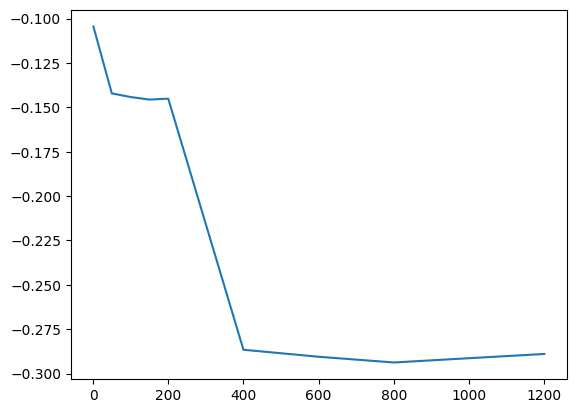

In [43]:
plt.plot(burst, parametersk)

In [44]:
filtered = []
transition = []

# Assuming 'b' is a list of datasets

for dataset in b:
    y_data = savgol_filter(dataset, window_length=11, polyorder=3)
    y_data = savgol_filter(y_data,window_length=11, polyorder=3)
    point = find_transition_point(dataset)
    transition.append(point)

IndexError: tuple index out of range

In [ ]:
print(transition)

In [45]:
transition = np.array([2, 23, 28, 34, 36, 22, 24, 25, 27, 27])

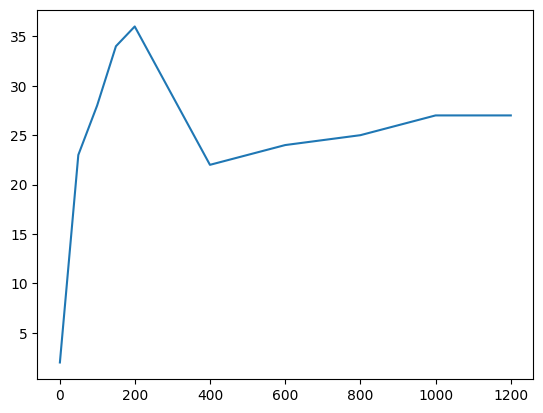

In [46]:
plt.plot(burst, transition)

In [47]:
data2 = pd.read_csv("million.csv")

In [75]:
display(data2)

,Burst100,Burst1000,Burst10000,Burst100000,Burst1000000
0,0.6012,0.5992,0.6102,0.6314,0.6012
1,0.6521,0.6122,0.6490,0.5903,0.6273
2,0.6325,0.6162,0.6172,0.6032,0.6294
3,0.6132,0.6335,0.5972,0.6263,0.6273
4,0.6002,0.6162,0.6052,0.6355,0.6243
...,...,...,...,...,...
145,0.0000,0.0002,0.0006,0.0189,0.1488
146,0.0001,0.0004,0.0007,0.0148,0.1342
147,0.0001,0.0002,0.0008,0.0140,0.1144
148,0.0000,0.0001,0.0018,0.0122,0.1083


In [76]:
b1000 = [data2.Burst1000]
b10000 =[data2.Burst10000]
b100000 = [data2.Burst100000]
b1000000 = [data2.Burst1000000]

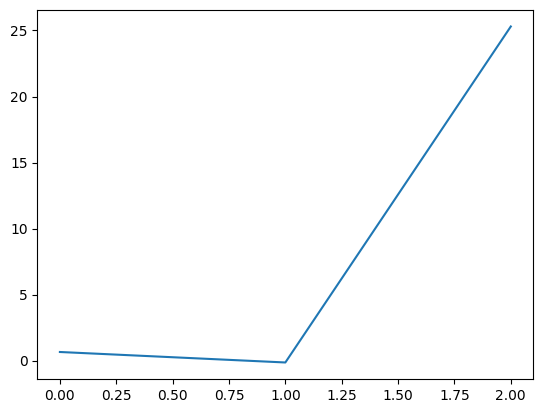

In [77]:
plt.plot(a)

In [78]:
b = ([b1, b50, b100, b150, b200, b1000, b10000, b100000, b1000000])

In [79]:
type(b)

list

In [80]:
filtered = []
transition = []

# Assuming 'b' is a list of datasets

for dataset in b:
    y_data = savgol_filter(dataset, window_length=11, polyorder=3)
    y_data = savgol_filter(y_data,window_length=11, polyorder=3)
    point = find_transition_point(dataset)
    transition.append(point)

NameError: name 'find_transition_point' is not defined